## 滤波操作
滤波器指的是在图像$I(x, y)$中根据像素点$(x, y)$邻近区域像素值计算得到衣服新图像$I'(x, y)$的算法.模板规定了滤波器的形状UI及区域内像素的值.称为滤波器或者核.常用的核通常都是线性核,简单的来说也就是$I'(x, y)$的值是一种加权求和运算得到.
$$
I'(x, y) = \sum_{i,j\in kernel}K_{i, j}\cdot I(x+i, y+j)
$$
*边界外推和边界处理*
在处理图像时,通常会面临图像边界的处理.Opencv中提供的`blur` `erode` `dilate`等函数返回的图像与原图大小是一样,这里Opencv是采用一种方法在原图周围添加虚拟像素.
自定义边框: 使用`CopyMakeBorder`函数,只要告诉函数添加像素的规则,库函数就会自动创建虚拟像素.

In [1]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline 

In [18]:
def imShow(img, res_img):
    plt.figure(figsize=(16,9))
    plt.subplot(121)
    plt.imshow(img)
    plt.subplot(122)
    plt.imshow(res_img)

### 边界填充

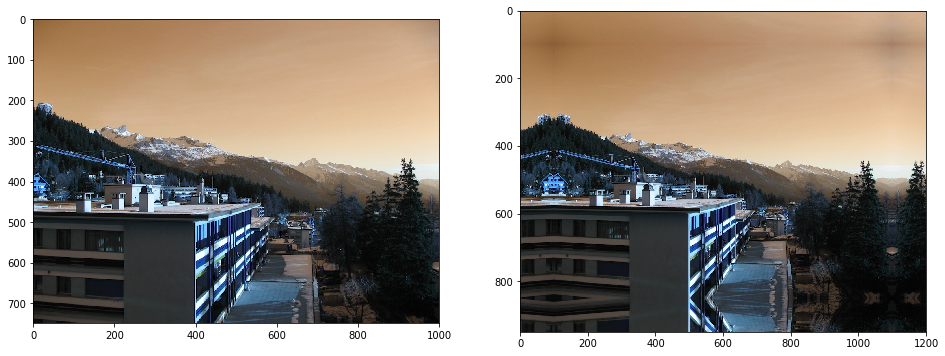

In [10]:
img = cv2.imread('test.jpg')
padding_img = cv2.copyMakeBorder(img, 100,100,100,100, cv2.BORDER_REFLECT)
imShow(img, padding_img)

`copyMakeBorder`函数接收原始图像,指定要填充的上下左右宽度和填充模式,返回填充后的图像,上面例子中为了效果明显,指定了填充长度均为100和复制边界模式,可以在生成的图中明显的看到边界处复制操作的痕迹
其中borderType参数可选模式如下

| BORDER_CONSTANT | 使用常量填充 |
| BORDER_CONSTANT | 从对侧复制 |
| BORDER_REPLICATE | 复制边缘像素 |
| BORDER_REFIECT | 反射|
| BORDER_REFLECT_101 | 反射,但是边缘像素不会加倍 |
| BORDER_DEFAULT | BORDER_REFLECT_101 |

### 阈值操作

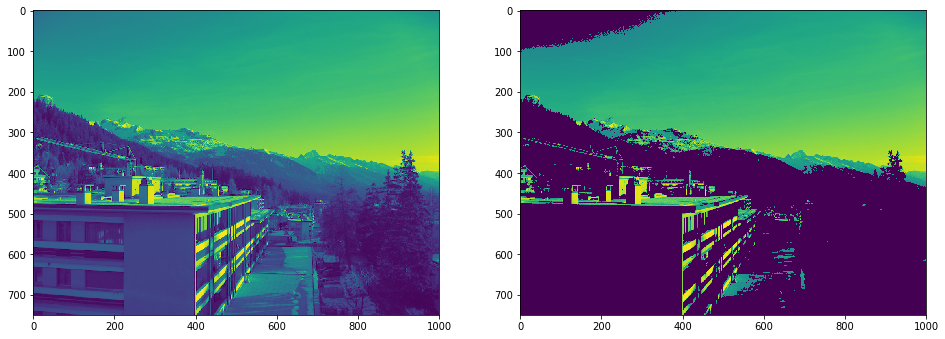

In [39]:
img = cv2.imread('test.jpg', 0)
#gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thres_img = cv2.threshold(img, 120, 100, cv2.THRESH_TOZERO)
imShow(img, thres_img)

阈值操作也可指定多种模式,这里想说的是OTSU算法,也就是在THRESH_TYPE中选择THRESH_OTSU时,OTSU会自动搜寻最优阈值,但是在灰度直方图具有双峰的时候效果最好,其他情况与全局阈值类似

### 自适应阈值

`threshold`是指定的是全局阈值,但很多情况图像的某些部分对全局阈值的适应不是很好,这时候就可以使用自适应阈值,简单的来说也就是局部阈值.
通过`adaptiveThreshold`函数实现

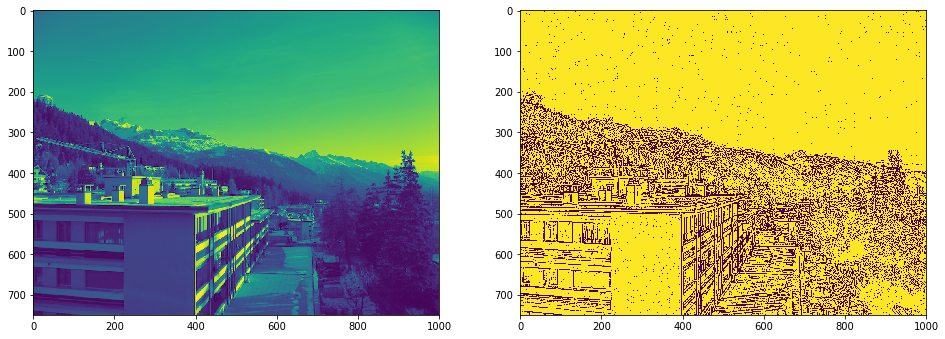

In [36]:
img = cv2.imread('test.jpg', 0)
#gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thres_img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 2)
imShow(img, thres_img)

## 平滑

### blur
均值滤波, 采用区域内均值

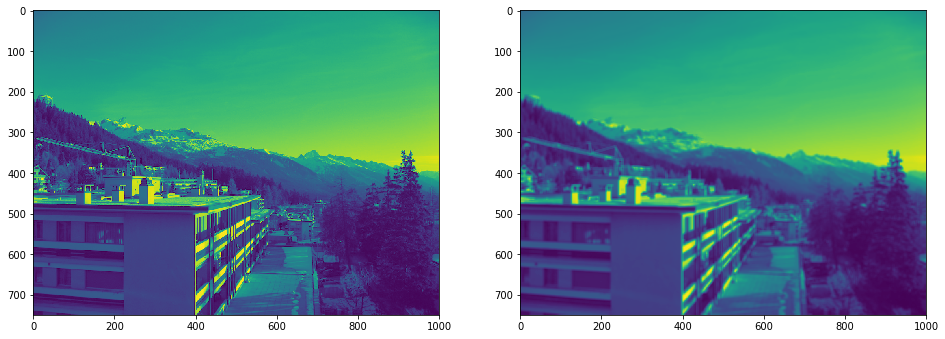

In [51]:
img = cv2.imread('test.jpg', 0)
blur_img = cv2.blur(img, ksize=(7,7), borderType=cv2.BORDER_DEFAULT)
imShow(img, blur_img)

### medianBlur
中值滤波, 采用区域的中指

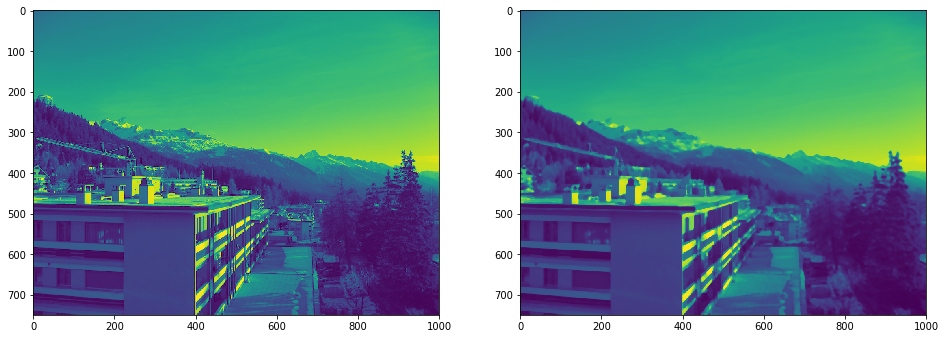

In [60]:
img = cv2.imread('test.jpg', 0)
median_img = cv2.medianBlur(img, ksize=7)
imShow(img, median_img)

### GaussianBlur
高斯滤波, 采用高斯分布加权求和

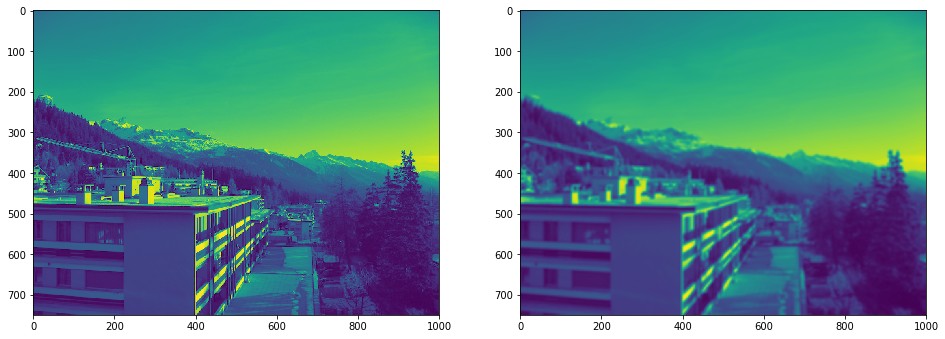

In [65]:
img = cv2.imread('test.jpg', 0)
gaussian_img = cv2.GaussianBlur(img, ksize=(11, 11), sigmaX=3, sigmaY=0)
imShow(img, gaussian_img)

### bilateralFilter
双边滤波,

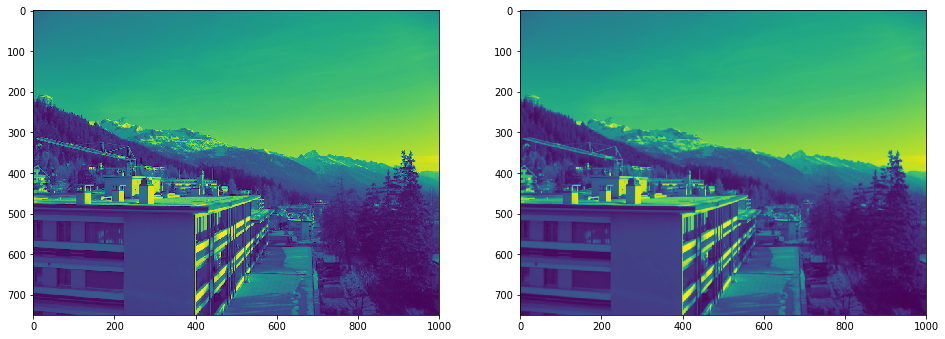

In [71]:
img = cv2.imread('test.jpg', 0)
bilateral_img = cv2.bilateralFilter(img, d=4,sigmaColor=100,sigmaSpace=2 )
imShow(img, bilateral_img)

## 导数与梯度